In [425]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [426]:
import pandas as pd
df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv")
df

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]

In [427]:
average_selling_price = round(df[['selling_price']].mean(), 2)[0]

<ipython-input-427-8f3d042e2fda>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  average_selling_price = round(df[['selling_price']].mean(), 2)[0]


In [428]:
average_selling_price

504127.31

In [429]:
pd.DataFrame(df[['transmission']].groupby('transmission').value_counts())

count
transmission       
Automatic       448
Manual         3892

In [430]:
pd.DataFrame(df[['fuel']].groupby('fuel').value_counts())

count
fuel           
CNG          40
Diesel     2153
Electric      1
LPG          23
Petrol     2123

In [431]:
pd.DataFrame(df[['owner']].groupby('owner').value_counts())

count
owner                      
First Owner            2832
Fourth & Above Owner     81
Second Owner           1106
Test Drive Car           17
Third Owner             304

In [432]:
pd.DataFrame(df[['seller_type']].groupby('seller_type').value_counts())

count
seller_type            
Dealer              994
Individual         3244
Trustmark Dealer    102

In [433]:
df[['name']].loc[0, :]

name    Maruti 800 AC
Name: 0, dtype: object

In [434]:
df.head(5)

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [435]:
df.tail(5)

name  year  selling_price  km_driven  \
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner

In [436]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [437]:
df.columns[1:4]

Index(['year', 'selling_price', 'km_driven'], dtype='object')

In [438]:
df.columns.isna()

array([False, False, False, False, False, False, False, False])

In [439]:
clean_df = df.dropna()
clean_df

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]

In [440]:
df

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]

In [441]:
clean_df['year'].min(), clean_df['year'].max()

(1992, 2020)

In [442]:
clean_df['selling_price'].min(), clean_df['selling_price'].max(), clean_df['selling_price'].max()-clean_df['selling_price'].min()

(20000, 8900000, 8880000)

In [443]:
clean_df['selling_price'].idxmax()

3872

In [444]:
audi = pd.DataFrame(clean_df[['name','selling_price', 'year']].loc[clean_df['selling_price'].idxmax()])
audi.columns.names = ["Feature"]

In [445]:
audi = audi.rename({3872:'Values'}, axis=1)
audi

Feature                                          Values
name           Audi RS7 2015-2019 Sportback Performance
selling_price                                   8900000
year                                               2016

In [446]:
clean_df

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]

In [447]:
clean_df.sort_values('name', ascending=True).head(10)

name  year  selling_price  km_driven  \
4016        Ambassador CLASSIC 1500 DSL AC  2005         120000      50000   
3912        Ambassador CLASSIC 1500 DSL AC  2005         120000      50000   
2878           Ambassador Classic 2000 Dsz  2002          50000     120000   
3465  Ambassador Grand 1800 ISZ MPFI PW CL  2012         430000      50000   
3458                      Audi A4 1.8 TFSI  2012        1200000      60000   
3094                       Audi A4 2.0 TDI  2011        1295000      58000   
2578  Audi A4 2.0 TDI 177 Bhp Premium Plus  2013        1150000      53000   
99    Audi A4 2.0 TDI 177 Bhp Premium Plus  2013        1150000      53000   
1077               Audi A4 3.0 TDI Quattro  2013        1580000      86000   
899                Audi A4 3.0 TDI Quattro  2013        1580000      86000   

        fuel seller_type transmission                 owner  
4016  Diesel  Individual       Manual          Second Owner  
3912  Diesel  Individual       Manual          Second Owner  
2878  Diesel  Individual       Manual  Fourth & Above Owner  
3465  Petrol  Individual       Manual          Second Owner  
3458  Petrol  Individual    Automatic           Third Owner  
3094  Diesel      Dealer    Automatic           First Owner  
2578  Diesel      Dealer    Automatic           First Owner  
99    Diesel      Dealer    Automatic           First Owner  
1077  Diesel      Dealer    Automatic           First Owner  
899   Diesel      Dealer    Automatic           First Owner

In [448]:
df_fuel_types = pd.DataFrame(clean_df[['fuel']].groupby('fuel').value_counts())
df_fuel_types = df_fuel_types.rename({"count":"Value"}, axis=1).sort_values('Value', ascending=True)
df_fuel_types

Value
fuel           
Electric      1
LPG          23
CNG          40
Petrol     2123
Diesel     2153

In [449]:
n_rows = len(clean_df.index)
print(f"The index number is {n_rows}.")

n_columns = len(clean_df.columns)
print(f"The columns number is {n_columns}.", end="\n\n")

for el in clean_df.columns.values[0:]:
    print(f"Column name: {el}")

The index number is 4340.
The columns number is 8.

Column name: name
Column name: year
Column name: selling_price
Column name: km_driven
Column name: fuel
Column name: seller_type
Column name: transmission
Column name: owner


In [450]:
clean_df.fillna('xD')

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]

In [451]:
values_fuel_type = []
for value in df_fuel_types.values:
    values_fuel_type.append(value[0])
values_fuel_type

[1, 23, 40, 2123, 2153]

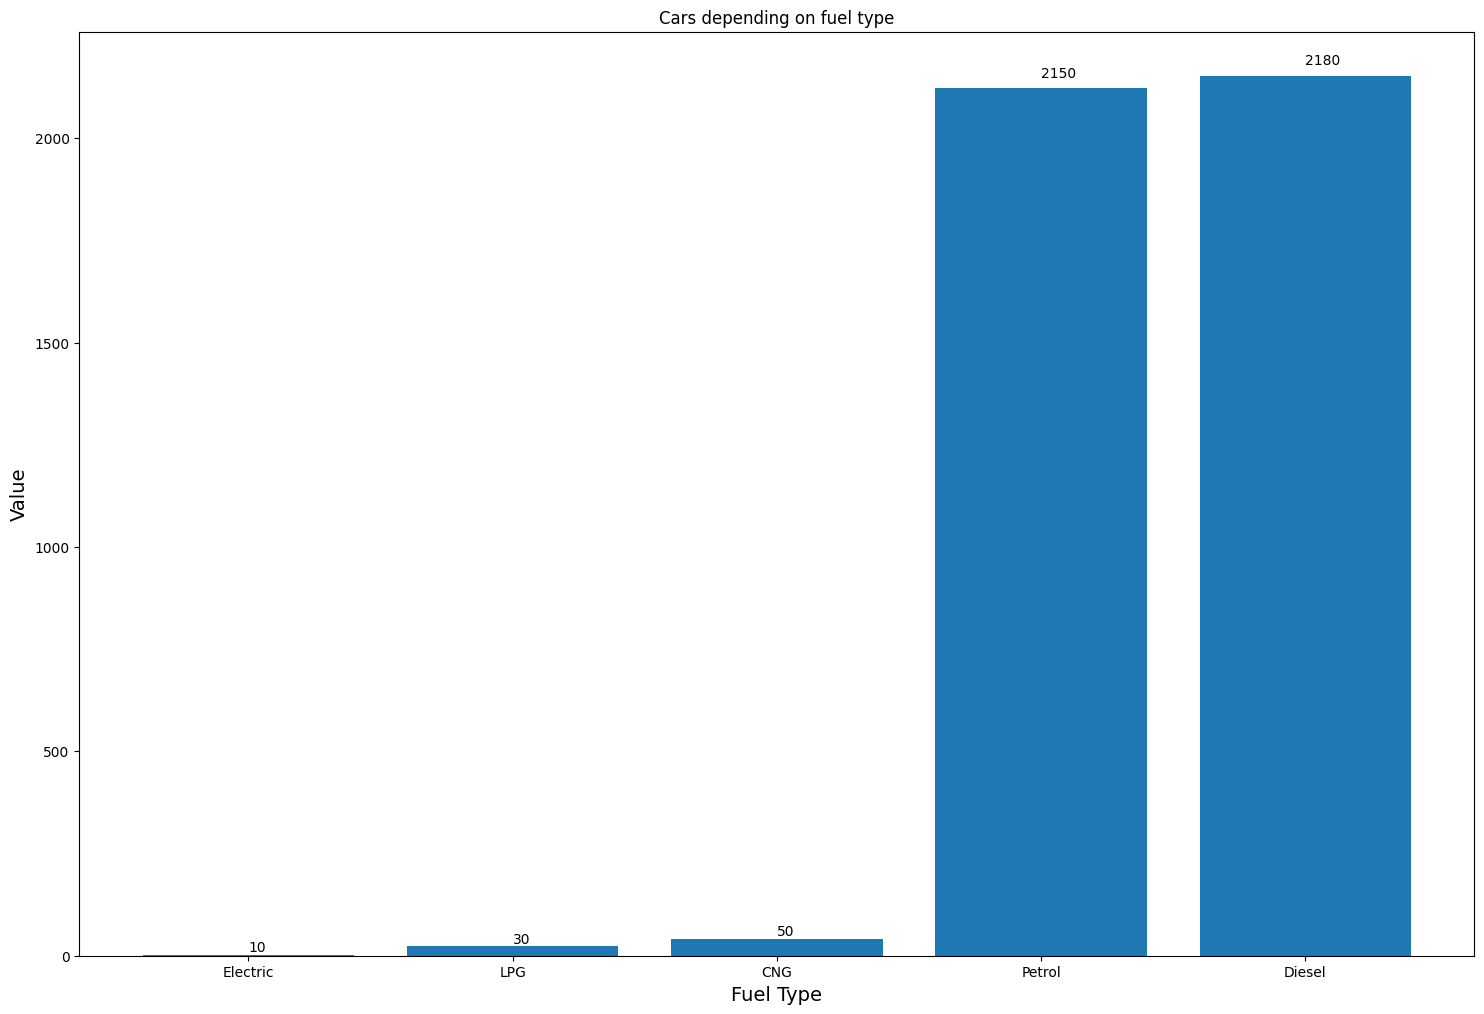

In [452]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12), dpi=100)
plt.bar(x=df_fuel_types.index, height=values_fuel_type, )
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Value', fontsize=14)
x = [1,1,1,1,1]
y = [10, 30, 50, 2150, 2180]
plt.title("Cars depending on fuel type")
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x, y)

In [453]:
clean_df[['name', 'year', 'selling_price']].sort_values('selling_price', ascending=False).head(5)

name  year  selling_price
3872           Audi RS7 2015-2019 Sportback Performance  2016        8900000
89    Mercedes-Benz S-Class S 350d Connoisseurs Edition  2017        8150000
3969            Mercedes-Benz GLS 2016-2020 350d 4MATIC  2016        5500000
2258                            BMW X5 xDrive 30d xLine  2019        4950000
612                             BMW X5 xDrive 30d xLine  2019        4950000

In [454]:
clean_df[['brand', 'name']] = clean_df['name'].str.split(' ', n=1, expand=True)

In [455]:
clean_df = clean_df[['brand', 'name', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'brand']]
clean_df

brand                         name  selling_price  km_driven    fuel  \
0      Maruti                       800 AC          60000      70000  Petrol   
1      Maruti            Wagon R LXI Minor         135000      50000  Petrol   
2     Hyundai                 Verna 1.6 SX         600000     100000  Diesel   
3      Datsun              RediGO T Option         250000      46000  Petrol   
4       Honda              Amaze VX i-DTEC         450000     141000  Diesel   
...       ...                          ...            ...        ...     ...   
4335  Hyundai  i20 Magna 1.4 CRDi (Diesel)         409999      80000  Diesel   
4336  Hyundai           i20 Magna 1.4 CRDi         409999      80000  Diesel   
4337   Maruti                 800 AC BSIII         110000      83000  Petrol   
4338  Hyundai     Creta 1.6 CRDi SX Option         865000      90000  Diesel   
4339  Renault                     KWID RXT         225000      40000  Petrol   

     seller_type transmission         owner    brand  
0     Individual       Manual   First Owner   Maruti  
1     Individual       Manual   First Owner   Maruti  
2     Individual       Manual   First Owner  Hyundai  
3     Individual       Manual   First Owner   Datsun  
4     Individual       Manual  Second Owner    Honda  
...          ...          ...           ...      ...  
4335  Individual       Manual  Second Owner  Hyundai  
4336  Individual       Manual  Second Owner  Hyundai  
4337  Individual       Manual  Second Owner   Maruti  
4338  Individual       Manual   First Owner  Hyundai  
4339  Individual       Manual   First Owner  Renault  

[4340 rows x 9 columns]

In [456]:
clean_df = clean_df.iloc[0:, 0:8]
clean_df

brand                         name  selling_price  km_driven    fuel  \
0      Maruti                       800 AC          60000      70000  Petrol   
1      Maruti            Wagon R LXI Minor         135000      50000  Petrol   
2     Hyundai                 Verna 1.6 SX         600000     100000  Diesel   
3      Datsun              RediGO T Option         250000      46000  Petrol   
4       Honda              Amaze VX i-DTEC         450000     141000  Diesel   
...       ...                          ...            ...        ...     ...   
4335  Hyundai  i20 Magna 1.4 CRDi (Diesel)         409999      80000  Diesel   
4336  Hyundai           i20 Magna 1.4 CRDi         409999      80000  Diesel   
4337   Maruti                 800 AC BSIII         110000      83000  Petrol   
4338  Hyundai     Creta 1.6 CRDi SX Option         865000      90000  Diesel   
4339  Renault                     KWID RXT         225000      40000  Petrol   

     seller_type transmission         owner  
0     Individual       Manual   First Owner  
1     Individual       Manual   First Owner  
2     Individual       Manual   First Owner  
3     Individual       Manual   First Owner  
4     Individual       Manual  Second Owner  
...          ...          ...           ...  
4335  Individual       Manual  Second Owner  
4336  Individual       Manual  Second Owner  
4337  Individual       Manual  Second Owner  
4338  Individual       Manual   First Owner  
4339  Individual       Manual   First Owner  

[4340 rows x 8 columns]

In [457]:
clean_df[['brand']].groupby('brand').agg({'brand':'count'})

brand
brand               
Ambassador         4
Audi              60
BMW               39
Chevrolet        188
Daewoo             1
Datsun            37
Fiat              37
Force              1
Ford             238
Honda            252
Hyundai          821
Isuzu              1
Jaguar             6
Jeep               3
Kia                1
Land               5
MG                 2
Mahindra         365
Maruti          1280
Mercedes-Benz     35
Mitsubishi         6
Nissan            64
OpelCorsa          2
Renault          146
Skoda             68
Tata             361
Toyota           206
Volkswagen       107
Volvo              4

In [458]:
brand_fuel = clean_df[['brand', 'fuel']].groupby(['brand', 'fuel']).agg({'brand':'count'})
brand_fuel = brand_fuel.rename({'brand': 'Value'}, axis=1)
brand_fuel

Value
brand         fuel           
Ambassador    Diesel        3
              Petrol        1
Audi          Diesel       52
              Petrol        8
BMW           Diesel       38
              Petrol        1
Chevrolet     CNG           1
              Diesel       97
              LPG           1
              Petrol       89
Daewoo        Petrol        1
Datsun        Petrol       37
Fiat          Diesel       27
              Petrol       10
Force         Diesel        1
Ford          Diesel      164
              Petrol       74
Honda         Diesel       97
              Petrol      155
Hyundai       CNG           8
              Diesel      243
              LPG           8
              Petrol      562
Isuzu         Diesel        1
Jaguar        Diesel        3
              Petrol        3
Jeep          Diesel        2
              Petrol        1
Kia           Diesel        1
Land          Diesel        4
              Petrol        1
MG            Diesel        1
              Petrol        1
Mahindra      Diesel      350
              Petrol       15
Maruti        CNG          30
              Diesel      384
              LPG          14
              Petrol      852
Mercedes-Benz Diesel       29
              Petrol        6
Mitsubishi    Diesel        5
              Petrol        1
Nissan        Diesel       44
              Petrol       20
OpelCorsa     Petrol        2
Renault       Diesel       77
              Petrol       69
Skoda         Diesel       53
              Petrol       15
Tata          CNG           1
              Diesel      233
              Petrol      127
Toyota        Diesel      166
              Electric      1
              Petrol       39
Volkswagen    Diesel       74
              Petrol       33
Volvo         Diesel        4

In [459]:
brand_fuel.sort_values('Value', ascending=False)[brand_fuel['Value'] > 100]

<ipython-input-459-bc5ee6942b8f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  brand_fuel.sort_values('Value', ascending=False)[brand_fuel['Value'] > 100]


Value
brand    fuel         
Maruti   Petrol    852
Hyundai  Petrol    562
Maruti   Diesel    384
Mahindra Diesel    350
Hyundai  Diesel    243
Tata     Diesel    233
Toyota   Diesel    166
Ford     Diesel    164
Honda    Petrol    155
Tata     Petrol    127

In [460]:
maruti_sorted = clean_df[(clean_df['brand'] == 'Maruti') & (clean_df['fuel'] == 'Petrol')][['brand','name','selling_price']].sort_values('selling_price', ascending=False)
maruti_sorted

brand                  name  selling_price
2906  Maruti  Ertiga ZXI AT Petrol         950000
2364  Maruti        Ciaz 1.4 Alpha         925000
2366  Maruti        Ciaz 1.4 Alpha         925000
662   Maruti        Ciaz Zeta BSIV         925000
3663  Maruti          Alto 800 LXI         900000
...      ...                   ...            ...
3215  Maruti                800 AC          40000
3237  Maruti               800 Std          40000
1350  Maruti                800 EX          40000
4290  Maruti               800 Std          37500
2444  Maruti                800 EX          30000

[852 rows x 3 columns]

In [461]:
print(f"The average price of Maruti cars is {round(maruti_sorted['selling_price'].mean())}$.")

The average price of Maruti cars is 265137$.


In [462]:
most_used_cars = clean_df[['brand', 'km_driven']].groupby('brand').mean().round().sort_values('km_driven', ascending=False)

most_used_cars

most_used_cars['km_driven'].values
most_used_cars.index.values

array(['Mitsubishi', 'Toyota', 'Land', 'Volvo', 'OpelCorsa', 'Mahindra',
       'Skoda', 'Fiat', 'Tata', 'Volkswagen', 'Chevrolet', 'Nissan',
       'Ambassador', 'Ford', 'Audi', 'Maruti', 'Honda', 'Hyundai',
       'Jaguar', 'Daewoo', 'Renault', 'BMW', 'Mercedes-Benz', 'Isuzu',
       'Force', 'Datsun', 'Jeep', 'MG', 'Kia'], dtype=object)

<BarContainer object of 29 artists>

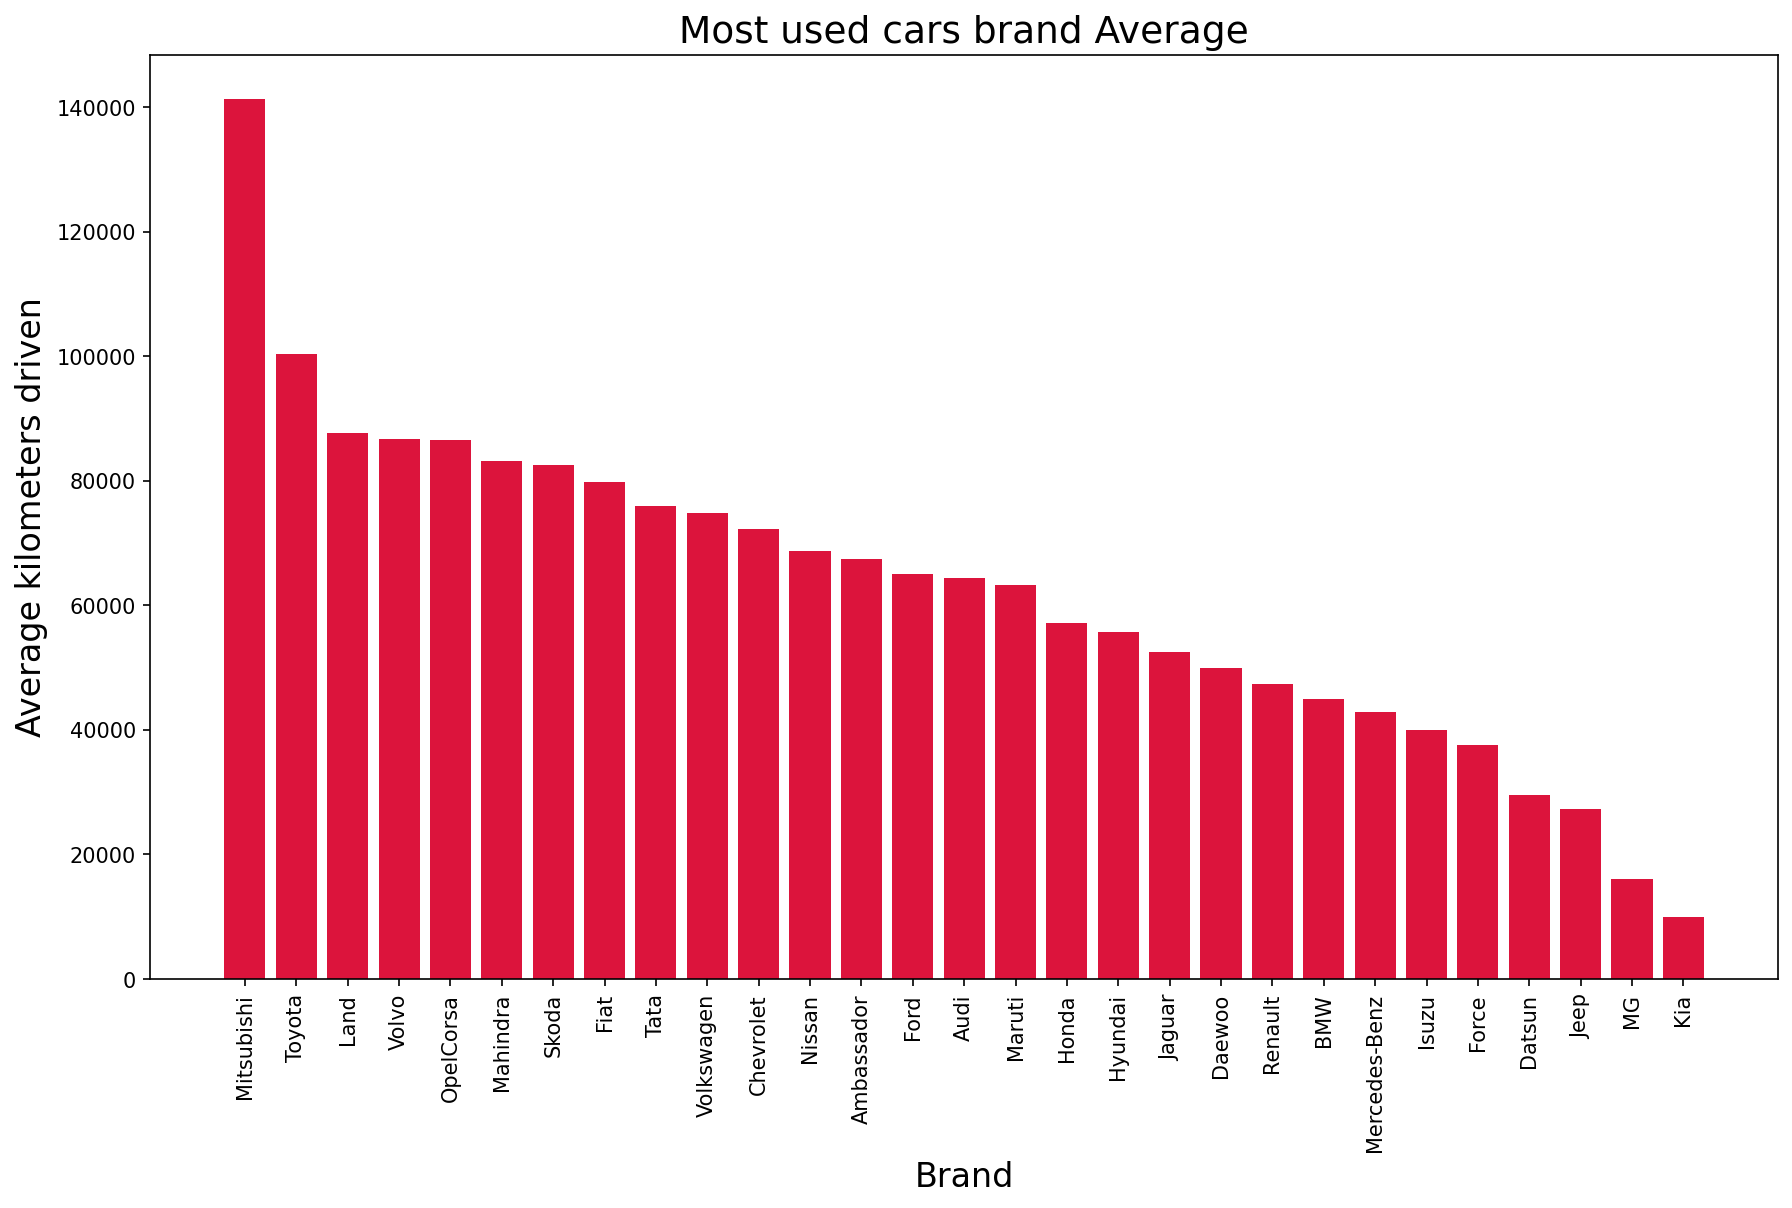

In [463]:
plt.figure(figsize=(14, 8), dpi=150)
plt.title('Most used cars brand Average', fontsize=18)
plt.xlabel('Brand', fontsize=16)
plt.ylabel('Average kilometers driven', fontsize=16)
plt.xticks(rotation=90)
plt.bar(x=most_used_cars.index.values, height=most_used_cars['km_driven'].values, color='crimson')

In [464]:
clean_df

brand                         name  selling_price  km_driven    fuel  \
0      Maruti                       800 AC          60000      70000  Petrol   
1      Maruti            Wagon R LXI Minor         135000      50000  Petrol   
2     Hyundai                 Verna 1.6 SX         600000     100000  Diesel   
3      Datsun              RediGO T Option         250000      46000  Petrol   
4       Honda              Amaze VX i-DTEC         450000     141000  Diesel   
...       ...                          ...            ...        ...     ...   
4335  Hyundai  i20 Magna 1.4 CRDi (Diesel)         409999      80000  Diesel   
4336  Hyundai           i20 Magna 1.4 CRDi         409999      80000  Diesel   
4337   Maruti                 800 AC BSIII         110000      83000  Petrol   
4338  Hyundai     Creta 1.6 CRDi SX Option         865000      90000  Diesel   
4339  Renault                     KWID RXT         225000      40000  Petrol   

     seller_type transmission         owner  
0     Individual       Manual   First Owner  
1     Individual       Manual   First Owner  
2     Individual       Manual   First Owner  
3     Individual       Manual   First Owner  
4     Individual       Manual  Second Owner  
...          ...          ...           ...  
4335  Individual       Manual  Second Owner  
4336  Individual       Manual  Second Owner  
4337  Individual       Manual  Second Owner  
4338  Individual       Manual   First Owner  
4339  Individual       Manual   First Owner  

[4340 rows x 8 columns]

In [465]:
df_data_owner = (clean_df[['owner']].groupby('owner').agg({'owner':'count'})/4340).round(4)
df_data_owner

owner
owner                       
First Owner           0.6525
Fourth & Above Owner  0.0187
Second Owner          0.2548
Test Drive Car        0.0039
Third Owner           0.0700

Text(0.5, 1.0, 'Ownership of Cars')

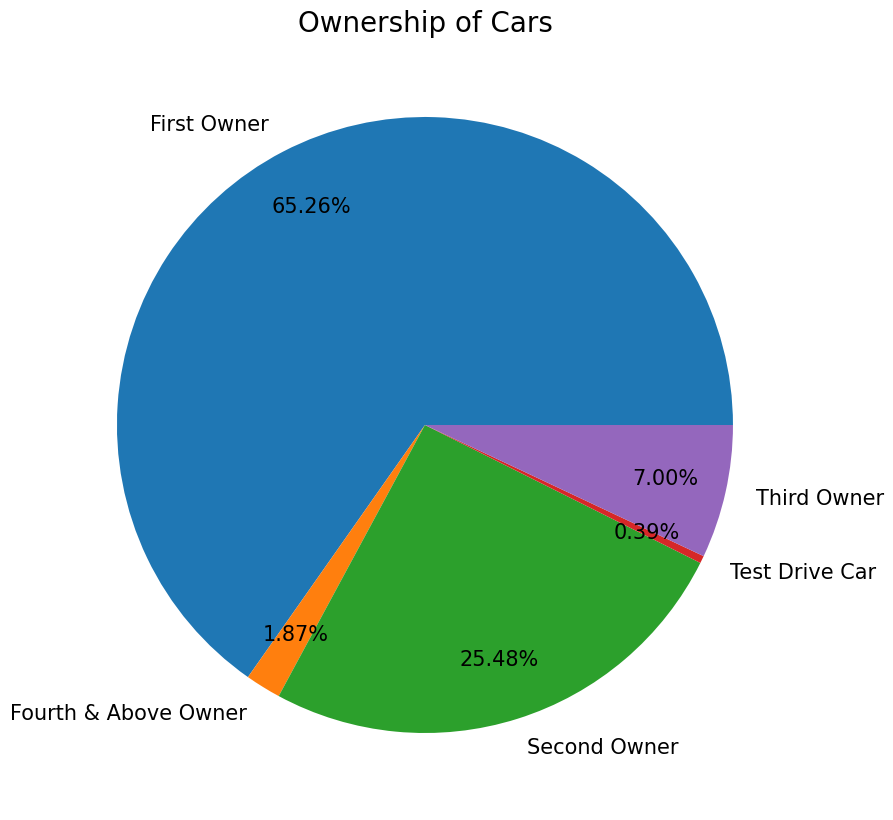

In [466]:
plt.figure(figsize=(16, 10), dpi=100)
plt.pie(df_data_owner['owner'].values, labels=df_data_owner.index.values, autopct='%1.2f%%', pctdistance=0.8, textprops={'fontsize': 15})
plt.title('Ownership of Cars', fontsize=20)

In [467]:
df_data_owner.index.values

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)

In [468]:
df_data_owner['owner'].values

array([0.6525, 0.0187, 0.2548, 0.0039, 0.07  ])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a57bd878ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a57bd878940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a57bd87a950>],
 'medians': [<matplotlib.lines.Line2D at 0x7a57bd878250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a57bd879ed0>],
 'means': []}

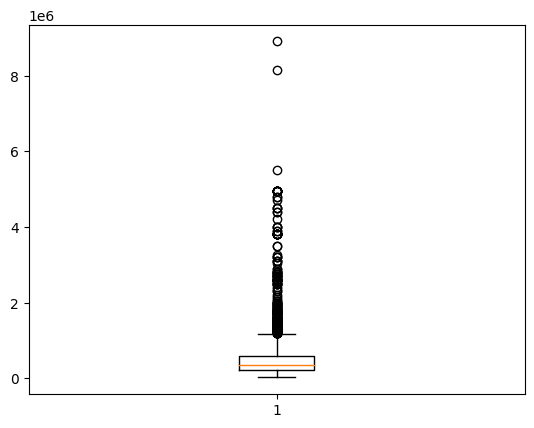

In [469]:
plt.boxplot(clean_df['selling_price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a57bbd00f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7a57bbd025f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a57bbd013f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a57bbd02050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a57bbd01ea0>],
 'means': []}

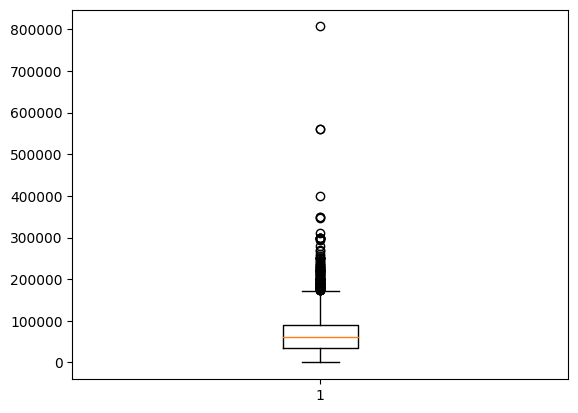

In [470]:
plt.boxplot(clean_df['km_driven'])

In [471]:
clean_df

brand                         name  selling_price  km_driven    fuel  \
0      Maruti                       800 AC          60000      70000  Petrol   
1      Maruti            Wagon R LXI Minor         135000      50000  Petrol   
2     Hyundai                 Verna 1.6 SX         600000     100000  Diesel   
3      Datsun              RediGO T Option         250000      46000  Petrol   
4       Honda              Amaze VX i-DTEC         450000     141000  Diesel   
...       ...                          ...            ...        ...     ...   
4335  Hyundai  i20 Magna 1.4 CRDi (Diesel)         409999      80000  Diesel   
4336  Hyundai           i20 Magna 1.4 CRDi         409999      80000  Diesel   
4337   Maruti                 800 AC BSIII         110000      83000  Petrol   
4338  Hyundai     Creta 1.6 CRDi SX Option         865000      90000  Diesel   
4339  Renault                     KWID RXT         225000      40000  Petrol   

     seller_type transmission         owner  
0     Individual       Manual   First Owner  
1     Individual       Manual   First Owner  
2     Individual       Manual   First Owner  
3     Individual       Manual   First Owner  
4     Individual       Manual  Second Owner  
...          ...          ...           ...  
4335  Individual       Manual  Second Owner  
4336  Individual       Manual  Second Owner  
4337  Individual       Manual  Second Owner  
4338  Individual       Manual   First Owner  
4339  Individual       Manual   First Owner  

[4340 rows x 8 columns]

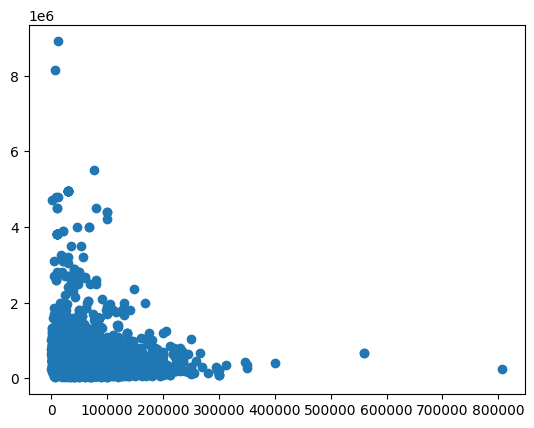

In [472]:
plt.scatter(x=clean_df['km_driven'], y=clean_df['selling_price'])

Text(0.5, 0, 'Distribution')

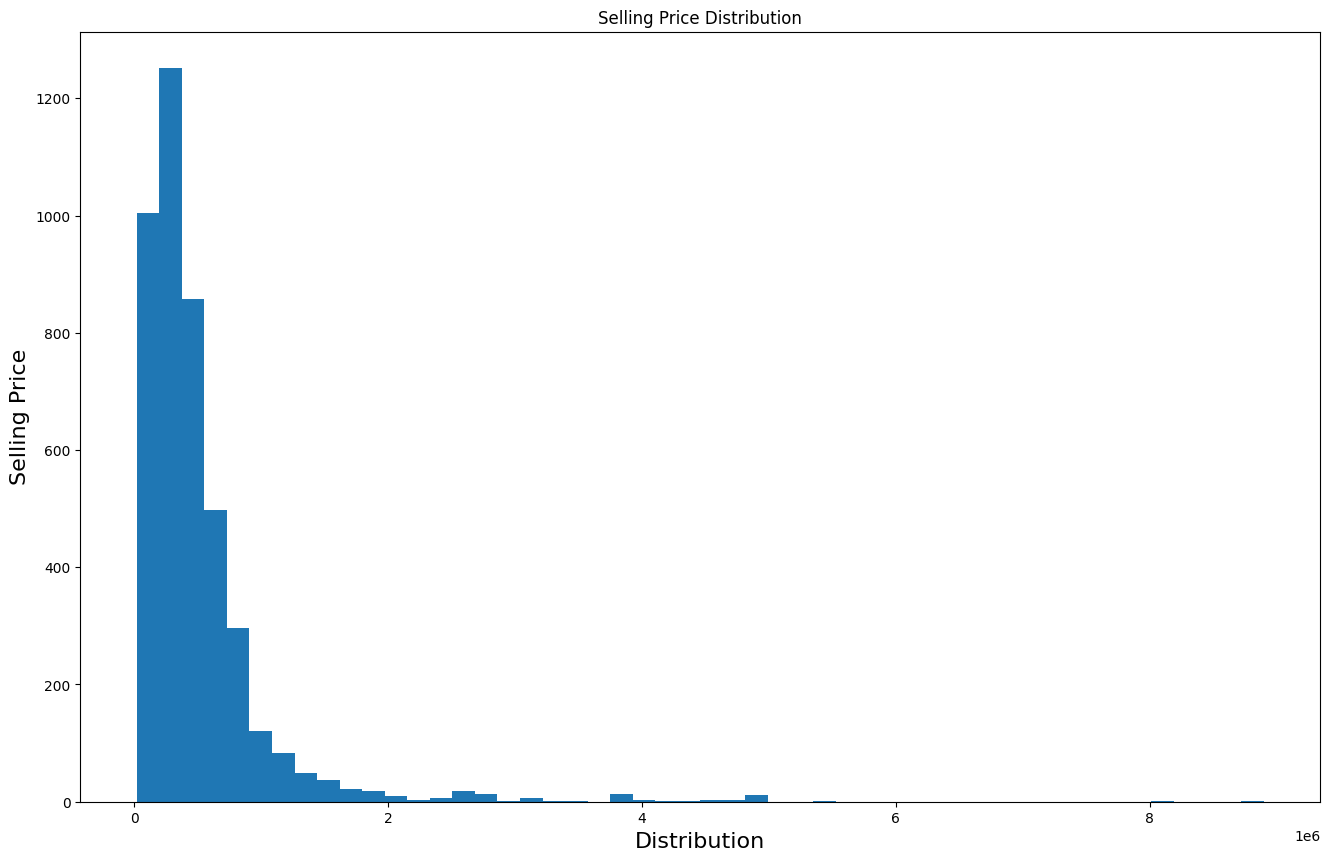

In [473]:
plt.figure(figsize=(16, 10), dpi=100)
plt.hist(clean_df['selling_price'], bins=50)
plt.title('Selling Price Distribution')
plt.ylabel('Selling Price', fontsize=16)
plt.xlabel('Distribution', fontsize=16)

In [474]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


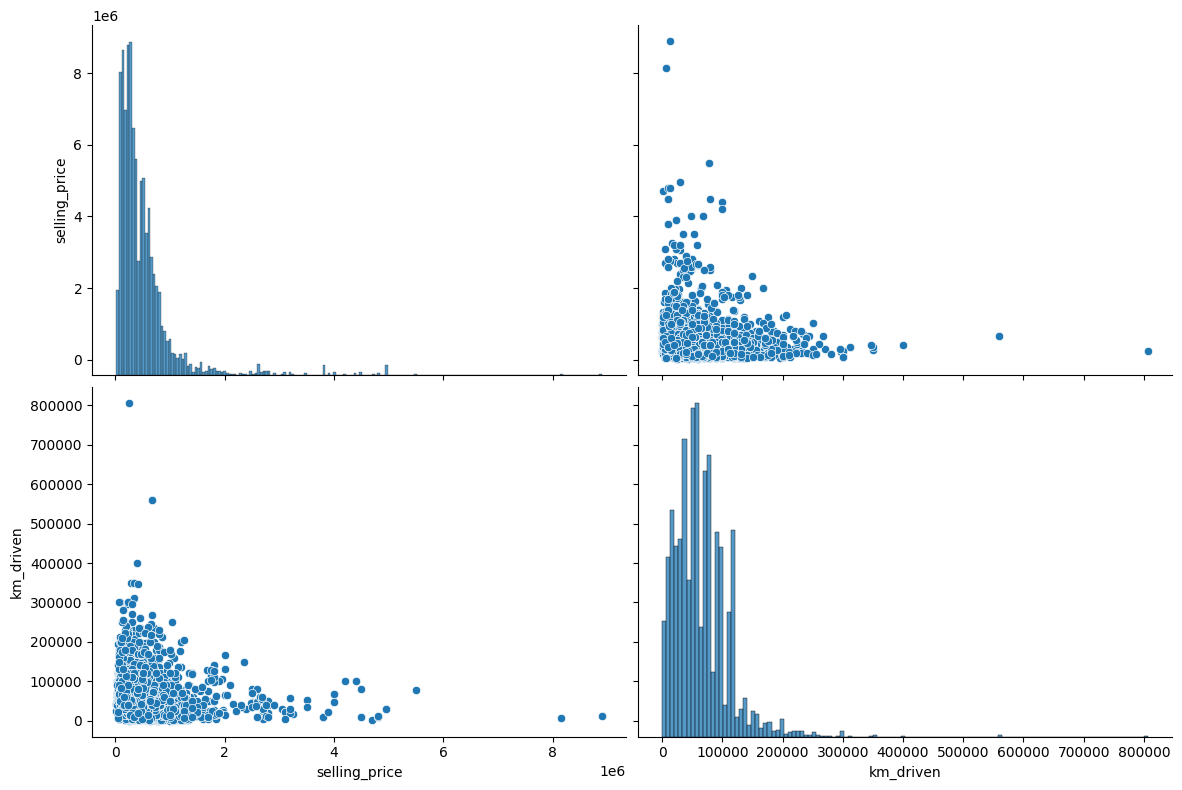

In [475]:

sns.pairplot(clean_df, height=4, aspect=1.5)

In [476]:
clean_df

brand                         name  selling_price  km_driven    fuel  \
0      Maruti                       800 AC          60000      70000  Petrol   
1      Maruti            Wagon R LXI Minor         135000      50000  Petrol   
2     Hyundai                 Verna 1.6 SX         600000     100000  Diesel   
3      Datsun              RediGO T Option         250000      46000  Petrol   
4       Honda              Amaze VX i-DTEC         450000     141000  Diesel   
...       ...                          ...            ...        ...     ...   
4335  Hyundai  i20 Magna 1.4 CRDi (Diesel)         409999      80000  Diesel   
4336  Hyundai           i20 Magna 1.4 CRDi         409999      80000  Diesel   
4337   Maruti                 800 AC BSIII         110000      83000  Petrol   
4338  Hyundai     Creta 1.6 CRDi SX Option         865000      90000  Diesel   
4339  Renault                     KWID RXT         225000      40000  Petrol   

     seller_type transmission         owner  
0     Individual       Manual   First Owner  
1     Individual       Manual   First Owner  
2     Individual       Manual   First Owner  
3     Individual       Manual   First Owner  
4     Individual       Manual  Second Owner  
...          ...          ...           ...  
4335  Individual       Manual  Second Owner  
4336  Individual       Manual  Second Owner  
4337  Individual       Manual  Second Owner  
4338  Individual       Manual   First Owner  
4339  Individual       Manual   First Owner  

[4340 rows x 8 columns]

In [477]:
df_car2 = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')
df_car2.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [478]:
cars_km_driven = df_car2[['Year', 'Kms_Driven']].groupby('Year').mean().round()
cars_km_driven

Kms_Driven
Year            
2003     94500.0
2004    135154.0
2005    104294.0
2006     87422.0
2007     51000.0
2008    112129.0
2009     67820.0
2010     60014.0
2011     40327.0
2012     43798.0
2013     41534.0
2014     38080.0
2015     32109.0
2016     18387.0
2017     10420.0
2018      2071.0

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


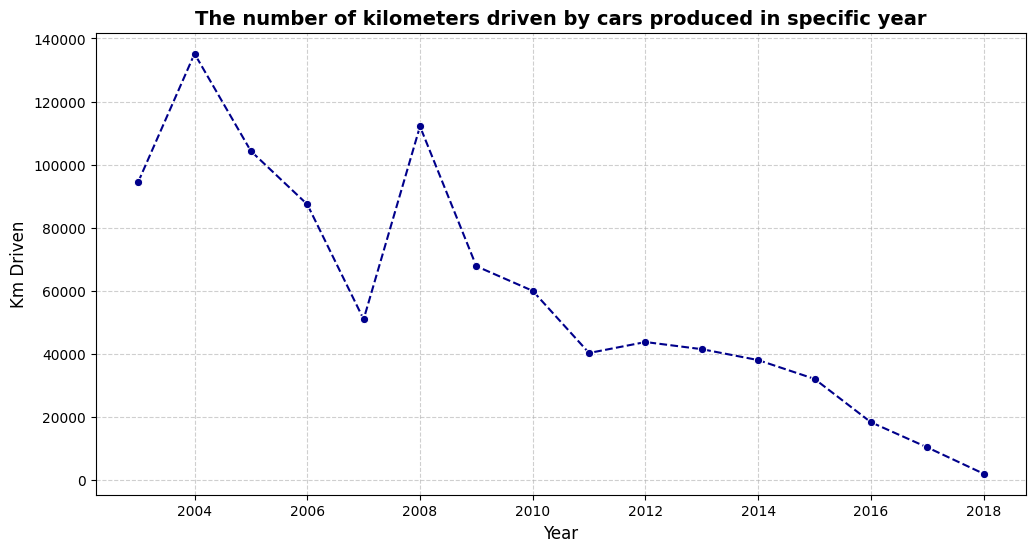

In [479]:
import seaborn as sns
import matplotlib.pyplot as plt

# Zwiększenie rozmiaru wykresu
plt.figure(figsize=(12, 6))

# Tworzenie wykresu liniowego z dostosowaną kolorystyką
sns.lineplot(data=cars_km_driven, x='Year', y='Kms_Driven', color='darkblue', marker='o', linestyle='dashed')

# Dodanie tytułu i etykiet osi
plt.title('The number of kilometers driven by cars produced in specific year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Km Driven', fontsize=12)

# Siatka dla lepszej czytelności
plt.grid(True, linestyle='--', alpha=0.6)

# Wyświetlenie wykresu
plt.show()


<Axes: xlabel='Year'>

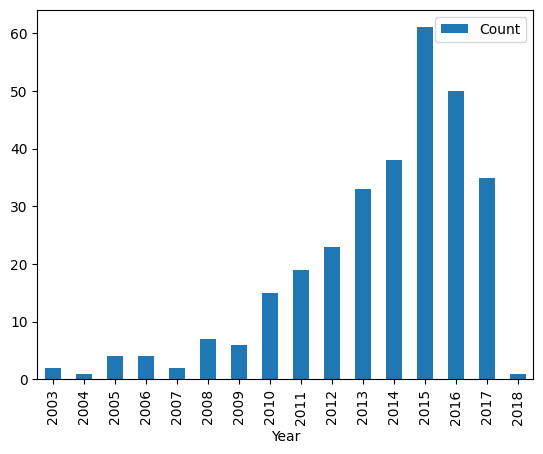

In [480]:
year_production = df_car2[['Year']].groupby('Year').agg({'Year':'count'})
year_production = year_production.rename({'Year':'Count'}, axis=1)
year_production.plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The Production of Cars through Years')

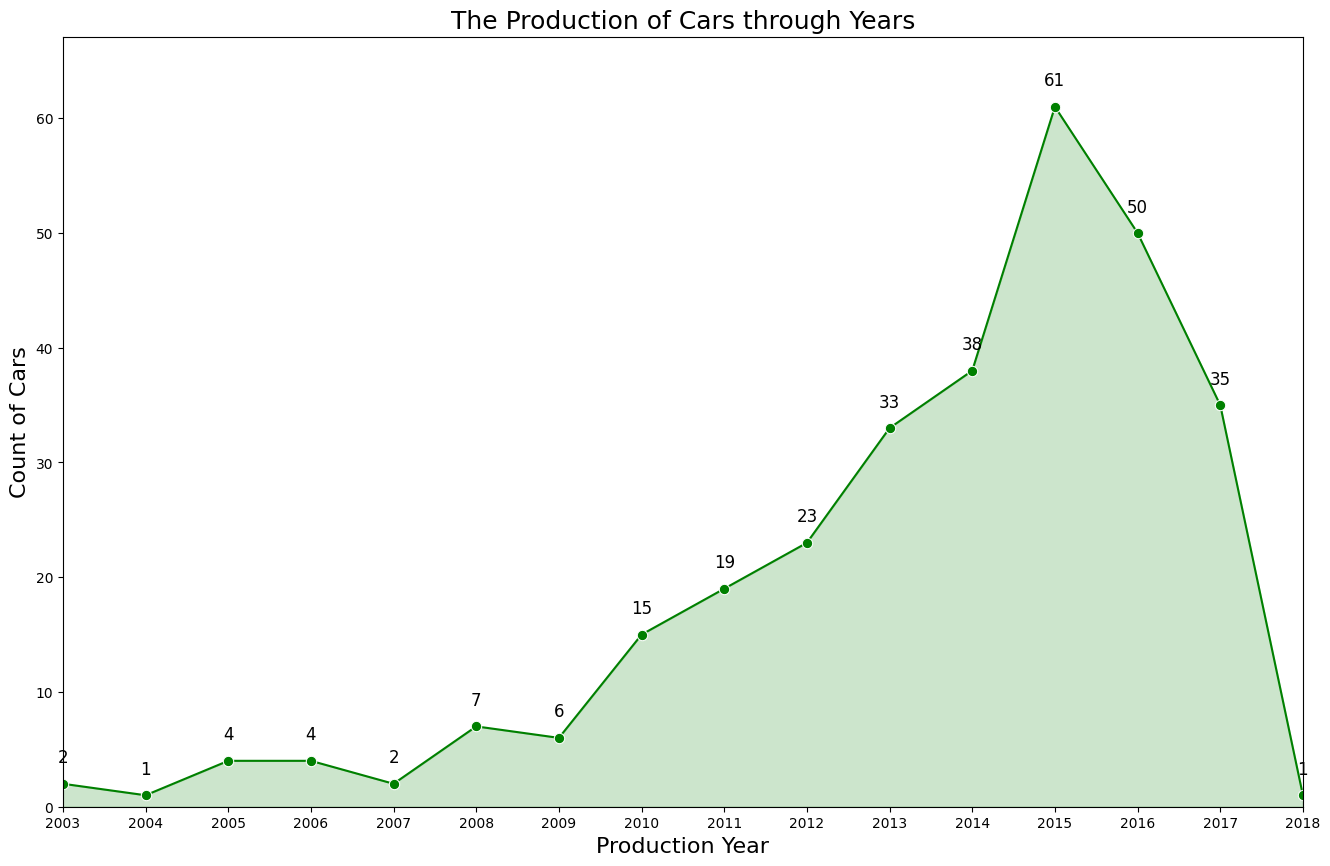

In [481]:
import numpy as np

plt.figure(figsize=(16, 10), dpi=100)
plt.xlabel('Production Year', fontsize=16)
plt.ylabel('Count of Cars', fontsize=16)
plt.ylim(0, year_production['Count'].max() + .1*year_production['Count'].max())
plt.xlim(year_production.index.min(), year_production.index.max())

sns.lineplot(year_production, x='Year', y='Count', color='green', markers=True, marker=".", markersize=15)
plt.fill_between(year_production.index, year_production['Count'], color='green', alpha=0.2)
plt.xticks(np.arange(year_production.index.min(), year_production.index.max()+1, dtype=int))

for x, y in zip(year_production.index, year_production['Count']):
    plt.text(x, y + 0.03 * year_production['Count'].max(), f'{y}', fontsize=12, ha='center', color='black')

plt.title("The Production of Cars through Years", fontsize=18)